In [1]:
%tensorflow_version 2.x

In [2]:
#Import all the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import cv2
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
base = "/content/drive/MyDrive/AIML/CapStone"
os.chdir(base)

# Pre Procesing

In [ ]:
df = pd.read_csv('Car names and make.csv', header=None,names =['names'])
df['year'] = df['names'].str[-4:]
df['names'] = df['names'].apply(lambda x:x[:-4])
df

,names,year
0,AM General Hummer SUV,2000
1,Acura RL Sedan,2012
2,Acura TL Sedan,2012
3,Acura TL Type-S,2008
4,Acura TSX Sedan,2012
...,...,...
191,Volkswagen Beetle Hatchback,2012
192,Volvo C30 Hatchback,2012
193,Volvo 240 Sedan,1993
194,Volvo XC90 SUV,2007


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   names   196 non-null    object
 1   year    196 non-null    object
dtypes: object(2)
memory usage: 3.2+ KB


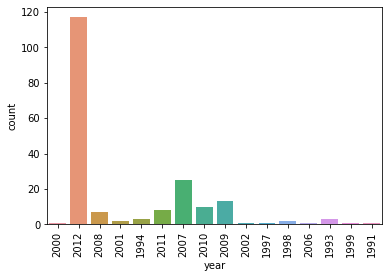

In [ ]:
sns.countplot(x='year',data=df)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
text = " ".join(name for name in df.names)
print ("There are {} words in the combination of all records.".format(len(text)))

There are 4669 words in the combination of all records.


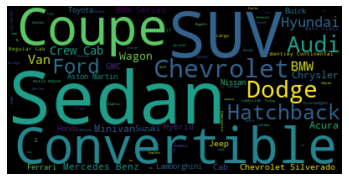

In [ ]:
from wordcloud import WordCloud
# Generate a word cloud image
wordcloud = WordCloud(background_color="black").generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

can observe dataset has more of Sedan , SUV and Coupe brand type cars

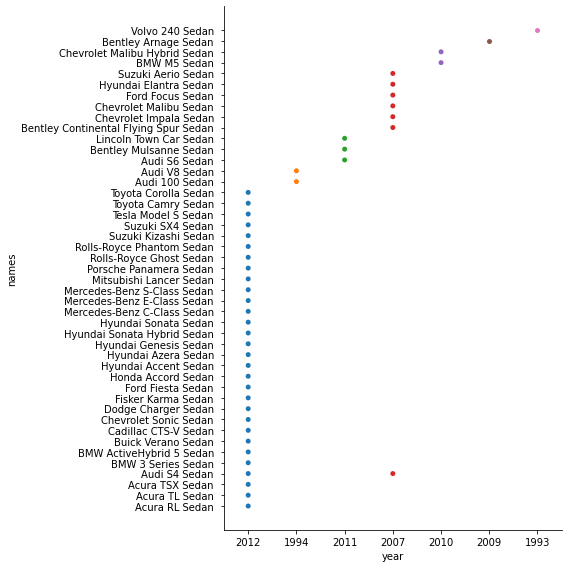

In [ ]:
# filtering the rows for Sedan
df1=df[df['names'].str.contains('Sedan')]
sns.catplot(y="names", x="year", data=df1,kind="swarm",height=8, aspect=1)

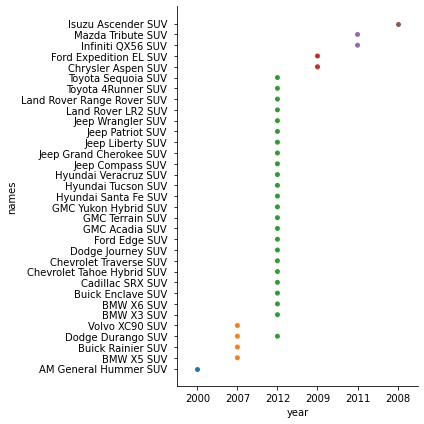

In [ ]:
# filtering the rows for Sedan
df2=df[df['names'].str.contains('SUV')]
sns.catplot(y="names", x="year", data=df2,kind="swarm",height=6, aspect=1)

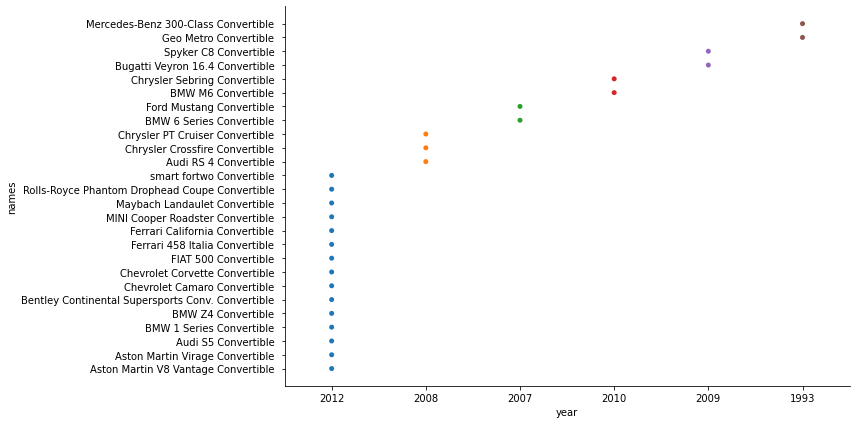

In [ ]:
# filtering the rows for Sedan
df3=df[df['names'].str.contains('Convertible')]
sns.catplot(y="names", x="year", data=df3,kind="swarm",height=6, aspect=2)

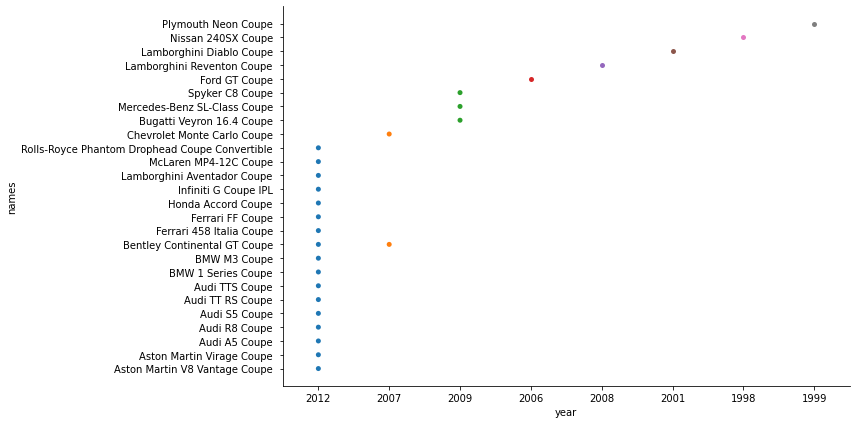

In [ ]:
# filtering the rows for Sedan
df4=df[df['names'].str.contains('Coupe')]
sns.catplot(y="names", x="year", data=df4,kind="swarm",height=6, aspect=2)

In [ ]:
def get_image_details(path):
    data = pd.DataFrame()
    base_path = os.path.join(base,path)

    # list all folders inside train directory
    for dname in os.listdir(base_path):   
      dir_path = os.path.join(base_path, dname)  
      # if it's a directory
      if os.path.isdir(dir_path):
        for fname in os.listdir(dir_path):
          # is it a valid file (ends with .jpg)
            if fname.endswith('.jpg'): 
              fpath = os.path.join(dir_path, fname)

            # read each image inside train directory one by one
              img = cv2.imread(fpath)
              sdpath = os.path.join(dname,fname)
              temp_df = pd.DataFrame({'filename' : [sdpath],'imgname':[fname],'height': [img.shape[0]],'width' : [img.shape[1]],'class' : [dname] })
              data = data.append(temp_df, ignore_index=True)
    return data           

In [ ]:
import cv2
test_path = 'Car Images/Test Images'
test_df = get_image_details(test_path)

In [ ]:
train_path = 'Car Images/Train Images'
train_df = get_image_details(train_path)

In [ ]:
test_df.sort_values(['imgname'], ascending=True,inplace=True)
train_df.sort_values(['imgname'], ascending=True,inplace=True)

In [ ]:
test_df.head()

,filename,imgname,height,width,class
7710,Suzuki Aerio Sedan 2007/00001.jpg,00001.jpg,182,276,Suzuki Aerio Sedan 2007
4036,Ferrari 458 Italia Convertible 2012/00002.jpg,00002.jpg,360,640,Ferrari 458 Italia Convertible 2012
5773,Jeep Patriot SUV 2012/00003.jpg,00003.jpg,741,1024,Jeep Patriot SUV 2012
7342,Toyota Camry Sedan 2012/00004.jpg,00004.jpg,480,640,Toyota Camry Sedan 2012
7419,Tesla Model S Sedan 2012/00005.jpg,00005.jpg,373,600,Tesla Model S Sedan 2012


In [ ]:
train_df.head()

,filename,imgname,height,width,class
1228,Audi TTS Coupe 2012/00001.jpg,00001.jpg,400,600,Audi TTS Coupe 2012
62,Acura TL Sedan 2012/00002.jpg,00002.jpg,675,900,Acura TL Sedan 2012
3626,Dodge Dakota Club Cab 2007/00003.jpg,00003.jpg,480,640,Dodge Dakota Club Cab 2007
5596,Hyundai Sonata Hybrid Sedan 2012/00004.jpg,00004.jpg,1386,2100,Hyundai Sonata Hybrid Sedan 2012
4482,Ford F-450 Super Duty Crew Cab 2012/00005.jpg,00005.jpg,108,144,Ford F-450 Super Duty Crew Cab 2012


In [ ]:
annt = "Annotations"
path = os.path.join(base,annt)
train_annt = pd.read_csv(path + '/Train Annotations.csv')
test_annt = pd.read_csv(path + '/Test Annotation.csv')

train_annt.columns=['imgname','xmin', 'ymin','xmax', 'ymax','label']
test_annt.columns=['imgname','xmin', 'ymin','xmax', 'ymax','label']

In [ ]:
train_annt.head(5)

,imgname,xmin,ymin,xmax,ymax,label
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91
3,00004.jpg,621,393,1484,1096,134
4,00005.jpg,14,36,133,99,106


In [ ]:
test_annt.head(5)

,imgname,xmin,ymin,xmax,ymax,label
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145
3,00004.jpg,67,84,581,407,187
4,00005.jpg,140,151,593,339,185


In [ ]:
test = pd.merge(test_df, test_annt, on='imgname')
train = pd.merge(train_df, train_annt, on='imgname')

In [ ]:

print("shape of Test set is ",test.shape)
print("shape of Train set is ",train.shape)

shape of Test set is  (8041, 10)
shape of Train set is  (8144, 10)


In [ ]:
test.to_csv('./test_df_final.csv',index=False)
train.to_csv('./train_df_final.csv',index=False)

# Load Test and Train file

In [5]:
test = pd.read_csv('./test_df_final.csv')
train = pd.read_csv('./train_df_final.csv')

In [ ]:
test.head()

,filename,imgname,height,width,class,xmin,ymin,xmax,ymax,label
0,Suzuki Aerio Sedan 2007/00001.jpg,00001.jpg,182,276,Suzuki Aerio Sedan 2007,30,52,246,147,181
1,Ferrari 458 Italia Convertible 2012/00002.jpg,00002.jpg,360,640,Ferrari 458 Italia Convertible 2012,100,19,576,203,103
2,Jeep Patriot SUV 2012/00003.jpg,00003.jpg,741,1024,Jeep Patriot SUV 2012,51,105,968,659,145
3,Toyota Camry Sedan 2012/00004.jpg,00004.jpg,480,640,Toyota Camry Sedan 2012,67,84,581,407,187
4,Tesla Model S Sedan 2012/00005.jpg,00005.jpg,373,600,Tesla Model S Sedan 2012,140,151,593,339,185


In [ ]:
train.head()

,filename,imgname,height,width,class,xmin,ymin,xmax,ymax,label
0,Audi TTS Coupe 2012/00001.jpg,00001.jpg,400,600,Audi TTS Coupe 2012,39,116,569,375,14
1,Acura TL Sedan 2012/00002.jpg,00002.jpg,675,900,Acura TL Sedan 2012,36,116,868,587,3
2,Dodge Dakota Club Cab 2007/00003.jpg,00003.jpg,480,640,Dodge Dakota Club Cab 2007,85,109,601,381,91
3,Hyundai Sonata Hybrid Sedan 2012/00004.jpg,00004.jpg,1386,2100,Hyundai Sonata Hybrid Sedan 2012,621,393,1484,1096,134
4,Ford F-450 Super Duty Crew Cab 2012/00005.jpg,00005.jpg,108,144,Ford F-450 Super Duty Crew Cab 2012,14,36,133,99,106


In [6]:
#Create a dictionary to hold label and corresponding class name
num_classes = train['label'].unique()
label_class_dict = dict(zip(train['label'], train['class']))

In [ ]:
num_classes

array([ 14,   3,  91, 134, 106, 123,  89,  96, 167,  58,  49, 186, 135,
        85, 193, 172,  73, 192,  57,  79,  36, 120, 170, 194, 184,  86,
       180, 154, 139,  66, 133, 104,  38,  97, 105, 142,  13, 191, 119,
        25, 177, 173,  42, 148,  15,  53,  44,  65,  90, 124, 114, 190,
       101, 187,   8,  17, 111, 122,   5,  29, 126,  94, 188,  59, 110,
        43,  18, 116, 145,  20, 165, 138, 175, 112,  51,  37,  71,  61,
        74, 162, 131,  88, 121, 137,  83, 147, 161, 109,  28, 144, 136,
       143, 171, 178,  56,  40,  60, 155, 140,  76,  47,  30, 149, 174,
       179,  24, 176,   1, 108,  41,  19, 163,  54,  50,  68, 125, 160,
        93, 183,  45, 189,  48,  77,   6,  16,  12, 128,  23,  11,  63,
        72, 195, 107,  10, 196,  99, 141,  84, 132,   7,  26, 102, 168,
       153,  21,  31, 103,  69,  55,  46, 185, 100, 130, 156, 151,  87,
       169, 127, 158,  75, 182,  62, 166, 181,  22,   9,  67, 113, 117,
       115,  39,  70,  32, 146,   4,  80, 152, 164,  64, 118,  9

In [ ]:
label_class_dict

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [ ]:
train['filename'][0]

'Audi TTS Coupe 2012/00001.jpg'

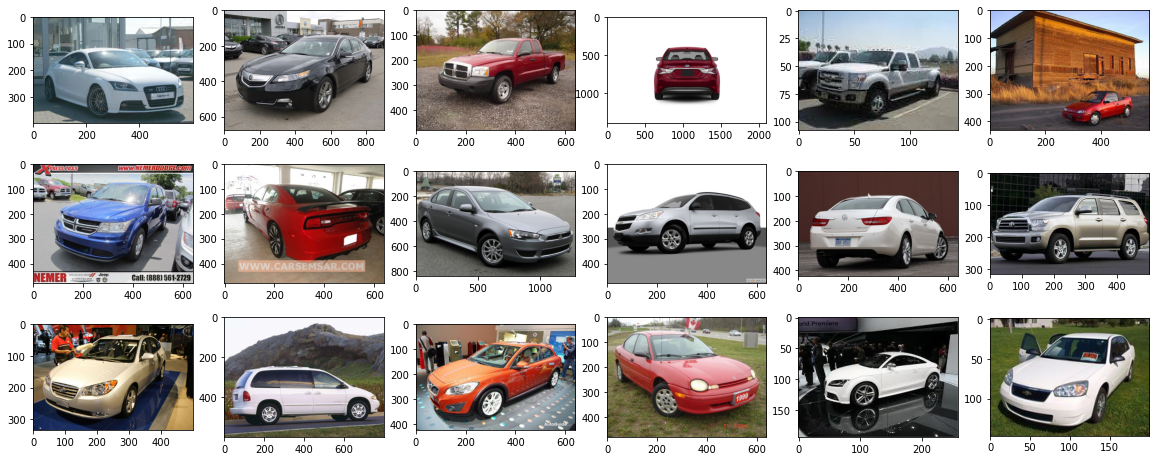

In [ ]:
train_path = '/content/drive/MyDrive/AIML/CapStone/Car Images/Train Images/'
# example train images
plt.figure(figsize=(20,8)) 
for i in range(18):
    plt.subplot(3, 6, i + 1) 
    plt.imshow(plt.imread(train_path + train[ 'filename'][i]))

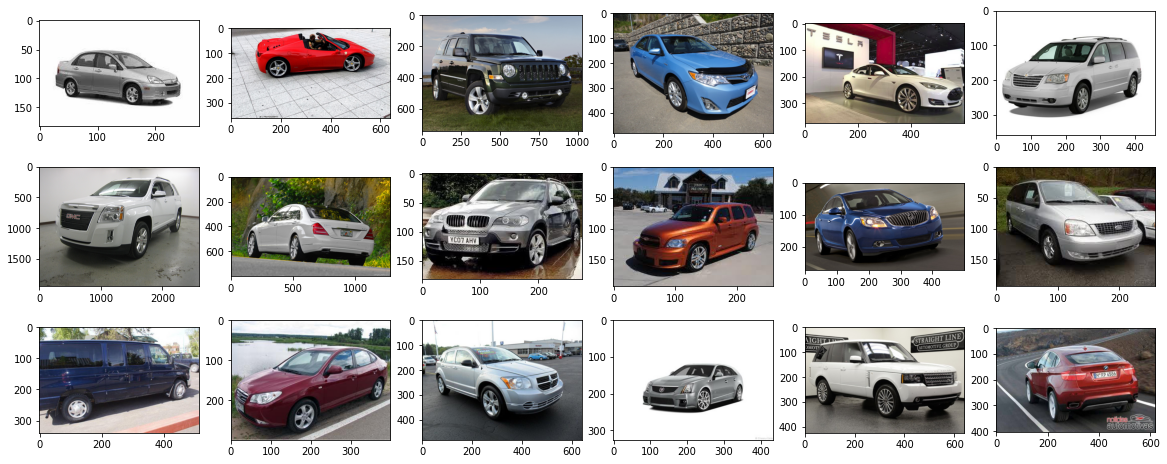

In [ ]:
test_path = '/content/drive/MyDrive/AIML/CapStone/Car Images/Test Images/'
# example test images
plt.figure(figsize=(20,8)) 
for i in range(18):
    plt.subplot(3, 6, i + 1) 
    plt.imshow(plt.imread(test_path + test['filename'][i]))

In [ ]:
#Read the image and draw a rectangle as per bounding box information
import cv2
def display_img_with_BB(path,idx):
    img = cv2.imread(path + train.loc[idx,'filename'])
    cv2.rectangle(img, 
                (train.loc[idx, 'xmin'],train.loc[idx, 'ymin']),
                (train.loc[idx, 'xmax'],train.loc[idx, 'ymax']), 
                (0,255,0),
                2)
    #Convert BGR format (used by opencv to RGB format used by matplotlib)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Draw image using matplotlib
    plt.suptitle(train.loc[img_num, 'class'])
    plt.imshow(img)
    plt.show()

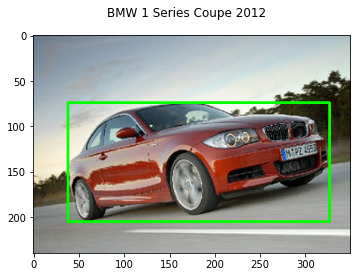

In [ ]:
path = '/content/drive/MyDrive/AIML/CapStone/Car Images/Train Images/'
#Pickup a random image number
img_num = np.random.randint(0, train.shape[0])
display_img_with_BB(path,img_num)

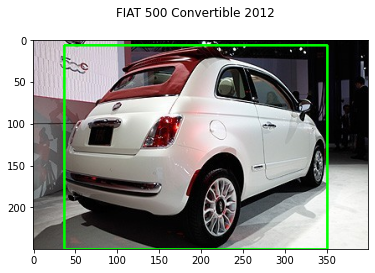

In [ ]:
path = '/content/drive/MyDrive/AIML/CapStone/Car Images/Train Images/'
#Pickup a random image number
img_num = np.random.randint(0, train.shape[0])
display_img_with_BB(path,img_num)

In [135]:
#Clone github repo
!git clone https://github.com/tensorflow/models

fatal: destination path 'models' already exists and is not an empty directory.


In [ ]:
#Upgrade pip package
!pip install --upgrade pip

In [ ]:
%%bash
cd models/research
# Compile protos.
protoc object_detection/protos/*.proto --python_out=.
# Install TensorFlow Object Detection API.
cp object_detection/packages/tf2/setup.py .
python -m pip install --use-feature=2020-resolver .

In [ ]:
#Check for Object Detection API
!pip list | grep object-detection

object-detection              0.1


In [ ]:
!mkdir detection

In [8]:
#Go to the project folder
%cd detection

/content/drive/My Drive/AIML/CapStone/detection


In [ ]:
!cp '/content/drive/MyDrive/AIML/CapStone/test_df_final.csv' .
!cp '/content/drive/MyDrive/AIML/CapStone/train_df_final.csv' .

In [ ]:

train_img_path ="/content/drive/MyDrive/AIML/CapStone/Car Images/Train Images"
test_img_path = "/content/drive/MyDrive/AIML/CapStone/Car Images/Test Images"

In [ ]:
#generate tfrecord for training data
!python generate_tfrecord.py --csv_input=train_df_final.csv --img_path='/content/drive/MyDrive/AIML/CapStone/Car Images/Train Images' --output_path=train.tfrecord

Successfully created the TFRecords: /content/drive/MyDrive/AIML/CapStone/detection/train.tfrecord


In [ ]:
#generate tfrecord for training data
!python generate_tfrecord.py --csv_input=test_df_final.csv --img_path="/content/drive/MyDrive/AIML/CapStone/Car Images/Test Images" --output_path=test.tfrecord

Successfully created the TFRecords: /content/drive/MyDrive/AIML/CapStone/detection/test.tfrecord


In [ ]:
ls -l

total 1952296
-rw-r--r-- 1 root root      4465 Nov 29 17:17 generate_tfrecord.py
-rw------- 1 root root    817611 Nov 29 17:16 test_df_final.csv
-rw-r--r-- 1 root root 998145296 Nov 29 17:18 test.tfrecord
-rw------- 1 root root    828263 Nov 29 17:16 train_df_final.csv
-rw-r--r-- 1 root root 999335395 Nov 29 17:17 train.tfrecord


In [ ]:
#Build a pbtxt label file

pbtxt_file_txt = ''
for label in sorted(label_class_dict.keys()):    
    pbtxt_file_txt += "item {\n  id: " + str(label) + "\n  name: '" +  label_class_dict[label] + "'\n}\n\n"

with open('label_map.txt','w') as pbfile:
    pbfile.write(pbtxt_file_txt)

In [ ]:
!cat label_map.txt

item {
  id: 1
  name: 'AM General Hummer SUV 2000'
}

item {
  id: 2
  name: 'Acura RL Sedan 2012'
}

item {
  id: 3
  name: 'Acura TL Sedan 2012'
}

item {
  id: 4
  name: 'Acura TL Type-S 2008'
}

item {
  id: 5
  name: 'Acura TSX Sedan 2012'
}

item {
  id: 6
  name: 'Acura Integra Type R 2001'
}

item {
  id: 7
  name: 'Acura ZDX Hatchback 2012'
}

item {
  id: 8
  name: 'Aston Martin V8 Vantage Convertible 2012'
}

item {
  id: 9
  name: 'Aston Martin V8 Vantage Coupe 2012'
}

item {
  id: 10
  name: 'Aston Martin Virage Convertible 2012'
}

item {
  id: 11
  name: 'Aston Martin Virage Coupe 2012'
}

item {
  id: 12
  name: 'Audi RS 4 Convertible 2008'
}

item {
  id: 13
  name: 'Audi A5 Coupe 2012'
}

item {
  id: 14
  name: 'Audi TTS Coupe 2012'
}

item {
  id: 15
  name: 'Audi R8 Coupe 2012'
}

item {
  id: 16
  name: 'Audi V8 Sedan 1994'
}

item {
  id: 17
  name: 'Audi 100 Sedan 1994'
}

item {
  id: 18
  name: 'Audi 100 Wagon 1994'
}

item {
  id: 19
  name: 'Audi TT Hatchb

In [ ]:
#download model from zoo
#!wget http://download.tensorflow.org/models/object_detection/ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
#!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz
#Extract tar file content
#!tar -xf ssd_mobilenet_v2_coco_2018_03_29.tar.gz
!tar -xf ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
#!tar -xf ssd_mobilenet_v2_fpnlite_320x320_coco17_tpu-8.tar.gz
#!tar -xf ssd_resnet50_v1_fpn_640x640_coco17_tpu-8.tar.gz

In [24]:
!cp /content/drive/MyDrive/AIML/CapStone/models/research/object_detection/samples/configs/ssd_resnet50_v1_fpn_shared_box_predictor_640x640_coco14_sync.config .

In [28]:
#config_file = 'ssd_mobilenet_v2_coco.config'
config_file = 'ssd_mobilenet_v2_modified.config'

In [26]:
#Copy training file from 'models/research/object_detection' folder to current folder
!cp /content/drive/MyDrive/AIML/CapStone/models/research/object_detection/model_main_tf2.py .

In [17]:
ls -l

total 2047137
drwx------ 2 root root      4096 Dec  3 12:57 detection_model/
-rw------- 1 root root      9635 Dec  3 12:57 export_inference_graph.py
-rw------- 1 root root      4465 Dec  1 10:24 generate_tfrecord.py
-rw------- 1 root root     11226 Dec  1 12:04 label_map.txt
-rw------- 1 root root      4937 Dec  1 13:30 model_main_tf2.py
drwx------ 9 root root      4096 Dec  3 16:01 models/
drwx------ 2 root root      4096 Dec  3 13:16 SSD_CAR_TF1/
drwx------ 2 root root      4096 May 10  2018 ssdlite_mobilenet_v2_coco_2018_05_09/
-rw------- 1 root root  51025348 May 10  2018 ssdlite_mobilenet_v2_coco_2018_05_09.tar.gz
-rw------- 1 root root      4649 Dec  3 04:49 ssdlite_mobilenet_v2_coco.config
drwx------ 2 root root      4096 Jul 11  2020 ssd_mobilenet_v2_320x320_coco17_tpu-8/
-rw------- 1 root root  46042990 Jul 11  2020 ssd_mobilenet_v2_320x320_coco17_tpu-8.tar.gz
-rw------- 1 root root      4720 Dec  3 04:22 ssd_mobilenet_v2_coco.config
-rw------- 1 root root    817611 Dec  1 10:

In [20]:
!mkdir training-tf2

In [31]:
#start training
!python model_main_tf2.py --model_dir=training-tf2/ --pipeline_config_path={config_file} --checkpoint_every_n=2000 --alsologtostderr

2021-12-03 17:34:36.717108: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1203 17:34:36.720568 140153955506048 mirrored_strategy.py:376] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: None
I1203 17:34:36.725907 140153955506048 config_util.py:552] Maybe overwriting train_steps: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1203 17:34:36.726071 140153955506048 config_util.py:552] Maybe overwriting use_bfloat16: False
Instructions for updating:
rename to distribute_datasets_from_function
W1203 17:34:36.764097 140153955506048 deprecation.py:347] From /usr/local/lib/python3.7/dist-packages/object_detection/model_lib_v2.py:558: StrategyBase.experiment

In [32]:
#start Evaluation
!python model_main_tf2.py --model_dir=training-tf2/ --pipeline_config_path={config_file} --checkpoint_dir=training-tf2/ --alsologtostderr 

W1203 18:54:30.143013 140535003314048 model_lib_v2.py:1082] Forced number of epochs for all eval validations to be 1.
INFO:tensorflow:Maybe overwriting sample_1_of_n_eval_examples: None
I1203 18:54:30.143268 140535003314048 config_util.py:552] Maybe overwriting sample_1_of_n_eval_examples: None
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1203 18:54:30.143360 140535003314048 config_util.py:552] Maybe overwriting use_bfloat16: False
INFO:tensorflow:Maybe overwriting eval_num_epochs: 1
I1203 18:54:30.143447 140535003314048 config_util.py:552] Maybe overwriting eval_num_epochs: 1
W1203 18:54:30.143567 140535003314048 model_lib_v2.py:1103] Expected number of evaluation epochs is 1, but instead encountered `eval_on_train_input_config.num_epochs` = 0. Overwriting `num_epochs` to 1.
2021-12-03 18:54:30.857430: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original confi

In [34]:
#Copy exporter file from models/research/object_detection to current directory
!cp /content/drive/MyDrive/AIML/CapStone/models/research/object_detection/exporter_main_v2.py .

#Provide input name, config file location, training folder
!python exporter_main_v2.py --input_type "image_tensor" --pipeline_config_path {config_file} --trained_checkpoint_dir training-tf2/ --output_directory detection_model

2021-12-03 19:11:02.540783: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1203 19:11:02.809762 139711950620544 deprecation.py:619] From /usr/local/lib/python3.7/dist-packages/tensorflow/python/autograph/impl/api.py:464: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
INFO:tensorflow:depth of addition

In [35]:
#Check if model is saved in current directory
!ls -l detection_model/saved_model

total 14159
drwx------ 2 root root     4096 Dec  3 19:12 assets
-rw------- 1 root root 14490075 Dec  3 19:12 saved_model.pb
drwx------ 2 root root     4096 Dec  3 19:12 variables


In [36]:
!mkdir SSD_CAR_TF2

!cp -r detection_model '/content/drive/MyDrive/AIML/CapStone/SSD_CAR_TF2' 

import pickle

file_path = '/content/drive/MyDrive/AIML/CapStone/SSD_CAR_TF2/car_class_label.pkl'

with open(file_path,'wb') as file:
    pickle.dump(label_class_dict, file)

In [10]:
import tensorflow as tf
saved_model_path = 'detection_model/saved_model'
model = tf.saved_model.load(saved_model_path)

In [17]:
label_class_dict

{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [32]:
#Function to get predictions from a Detection model
def detector_prediction(image_file, confidence_threshold=0.5):
    #Load image
    img = tf.keras.preprocessing.image.load_img(image_file)
    
    #Convert to numpy array
    img_array = tf.keras.preprocessing.image.img_to_array(img).astype('uint8')
    #Make it a batch of one example
    img_array = tf.expand_dims(img_array, axis=0)

    #Prediction
    output = model(img_array) #get list of tensors discussed above as output
    #print(output)
    detection_scores = output['detection_scores'].numpy()[0] #get detection scores
    detection_classes = output['detection_classes'].numpy()[0]
    detection_boxes = output['detection_boxes'].numpy()[0]
    #print(detection_scores)
    #Select predictions for which probability is higher than confidence_threshold
    selected_predictions = detection_scores >= confidence_threshold
    #print(selected_predictions)
    selected_prediction_scores = detection_scores[selected_predictions]
    selected_prediction_classes = detection_classes[selected_predictions]
    selected_prediction_boxes = detection_boxes[selected_predictions]

    #De-normalize box co-ordinates (multiply x-coordinates by image width and y-coords by image height)
    img_w, img_h = img.size

    for i in range(selected_prediction_boxes.shape[0]):
        
        selected_prediction_boxes[i,0] *= img_h #ymin * img_w
        selected_prediction_boxes[i,1] *= img_w #xmin * img_h
        selected_prediction_boxes[i,2] *= img_h #ymax * img_w
        selected_prediction_boxes[i,3] *= img_w #xmax * img_h

    #Make all co-ordinates as integer
    selected_prediction_boxes= selected_prediction_boxes.astype(int)

    #Convert class indexes to actual class labels
    predicted_classes = []
    for i in range(selected_prediction_classes.shape[0]):
        predicted_classes.append(label_class_dict[int(selected_prediction_classes[i])])

    #Number of predictions
    selected_num_predictions = selected_prediction_boxes.shape[0]

    return {'Total Predictions': selected_num_predictions,
            'Scores': selected_prediction_scores, 
            'Classes': predicted_classes, 
            'Box coordinates': selected_prediction_boxes}

Visualize model output

In [129]:
def visualize_output(image_file, confidence_threshold=0.5):

    #Call model prediction function above
    output = detector_prediction(image_file, confidence_threshold=confidence_threshold)

    #Read image
    img = cv2.imread(image_file)

    #Draw rectangle for predicted boxes, also add predicted classes
    for i in range(output['Box coordinates'].shape[0]):

        box = output['Box coordinates'][i]
        
        #Draw rectangle - (ymin, xmin, ymax, xmax)
        img = cv2.rectangle(img, (box[1], box[0]), (box[3], box[2]), (0,255,0), 2)
        
        #Add Label - Class name and confidence level
        label = output['Classes'][i] + ': ' + str(round(output['Scores'][i],2))
        img = cv2.putText(img, label, (box[1], box[0]-10), cv2.FONT_HERSHEY_TRIPLEX, 0.8, (255,255,255), 1,cv2.LINE_AA)
    
    #Conver BGR image to RGB to use with Matplotlib
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    #Display image
    plt.figure(figsize=(10,6))
    plt.imshow(img)
    plt.show()

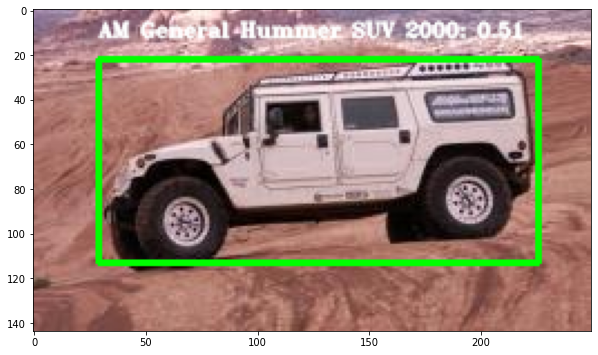

In [97]:
visualize_output('/content/drive/MyDrive/AIML/CapStone/Car Images/Test Images/AM General Hummer SUV 2000/00457.jpg',0.5)

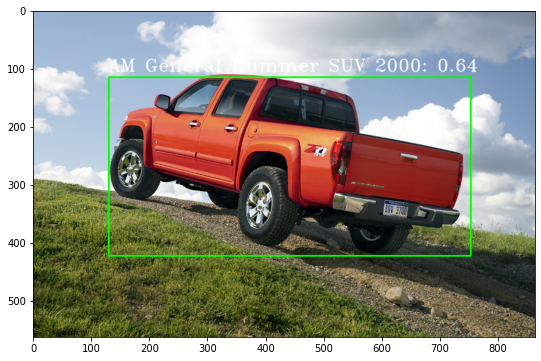

In [112]:
visualize_output('/content/drive/MyDrive/AIML/CapStone/Car Images/Test Images/HUMMER H3T Crew Cab 2010/00414.jpg',0.5)

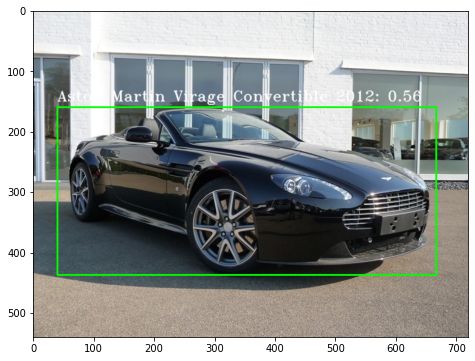

In [130]:
visualize_output('/content/drive/MyDrive/AIML/CapStone/Car Images/Test Images/Aston Martin V8 Vantage Convertible 2012/00239.jpg',0.5)